# Krylov Methods
## Gradient Descent


In [2]:
# # Import some python libraries we need
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt

In [101]:
# Define the size of the problem and construct the matrix
epsilon = 0.5
theta = 0.75
R = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
D = np.array([[epsilon,0],[0,1]])
A = R.transpose().dot(D.dot(R))
f = np.zeros(2)
u = np.random.rand(100,2)
k = 0

# Show the condition number of A
print(np.linalg.cond(A))


1.9999999999999998


(-0.9287327583105108, 0.9287327583105108)

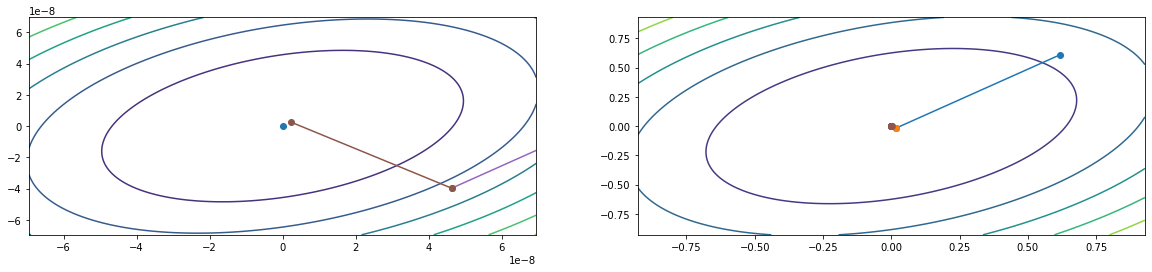

In [107]:
r = f - A.dot(u[k,:])
alpha = np.dot(r,r) / np.dot(r,A.dot(r))
u[k+1,:] = u[k,:] + alpha*r
k = k + 1

# Plot the level curves of phi
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
m = 200
d = max(u[k-1,0],u[k-1,1])
x, y = np.meshgrid(np.linspace(-1.5*d, 1.5*d, m), np.linspace(-1.5*d, 1.5*d, m))
X = np.array([x,y])
phi = np.zeros(np.shape(x))
for i in range(m*m):
    t = [x[i%m,int(i/m)],y[i%m,int(i/m)]]
    phi[i%m,int(i/m)] = 0.5*np.dot(t,A.dot(t)) - np.dot(t,f)

plt.contour(x,y,phi)
plt.scatter(0,0)
for j in range(k):
    plt.plot([u[j+1,0],u[j,0]],[u[j+1,1],u[j,1]],'-o')
plt.xlim((-1.5*d,1.5*d))
plt.ylim((-1.5*d,1.5*d))

# Plot the level curves of phi
plt.subplot(1,2,2)
d = max(u[0,0],u[0,1])
x, y = np.meshgrid(np.linspace(-1.5*d, 1.5*d, m), np.linspace(-1.5*d, 1.5*d, m))
X = np.array([x,y])
phi = np.zeros(np.shape(x))
for i in range(m*m):
    t = [x[i%m,int(i/m)],y[i%m,int(i/m)]]
    phi[i%m,int(i/m)] = 0.5*np.dot(t,A.dot(t)) - np.dot(t,f)

plt.contour(x,y,phi)
plt.scatter(0,0)
for j in range(k):
    plt.plot([u[j+1,0],u[j,0]],[u[j+1,1],u[j,1]],'-o')
plt.xlim((-1.5*d,1.5*d))
plt.ylim((-1.5*d,1.5*d))

# Conjugate Gradient (CG)

# Comparing CG and Gradient Descent
For larger, ill-conditioned problems, CG converges much faster than simple gradient descent.

In [ ]:

# Define the size of the problem and construct the matrix
n = 64
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')

# Define a solution and corresponding right-hand side
# u_final = np.random.rand(n)
# f = A*u_final

# Define a right-hand side and corresponding solution
# f = np.ones(n)
# u_final = sla.spsolve(A,f)

# Define a zero right-hand side and random initial guess
f = np.zeros(n)
u_final = np.zeros(n)
u = np.random.rand(n)

# Set the initial guess and make a copy
# u = np.zeros((n,))
u_next = u.copy()
i = 0